In [1]:
#!pip install scikit-learn

In [112]:
data = pd.read_csv('abalone.csv')

# add target(age) to dataset [rings + 1.5 = age ]
data['age'] = data.Rings + 1.5

 # remove rings variable
data.drop('Rings', axis=1, inplace=True)

print("Data loaded Successfully!")

Data loaded Successfully!


In [113]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [114]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [115]:
data.nunique().to_frame("# of unique values")

,# of unique values
Sex,3
Length,134
Diameter,111
Height,51
Whole weight,2429
Shucked weight,1515
Viscera weight,880
Shell weight,926
age,28


In [116]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.25, random_state=1)  #train test split
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3132
Test data points : 1045


In [117]:
numerical_features = ["Length", 'Diameter', 'Height','Whole weight',
                      'Shucked weight', 'Viscera weight', 'Shell weight']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'age'

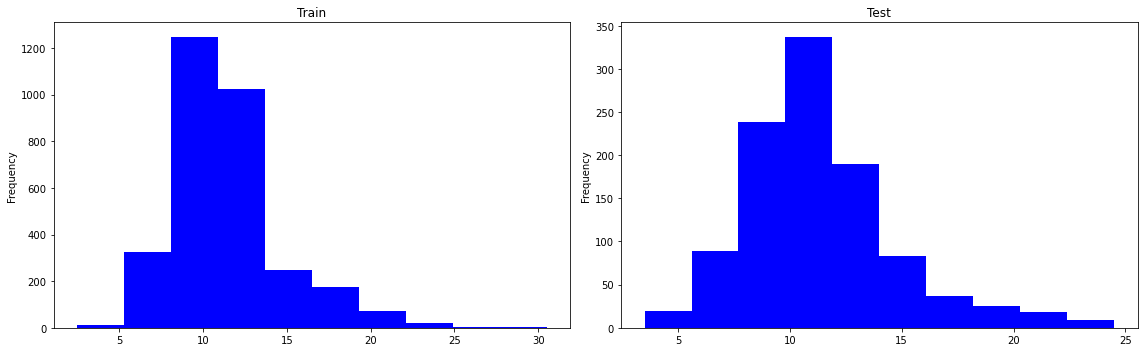

In [118]:
fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

**Distribution of numerical features**

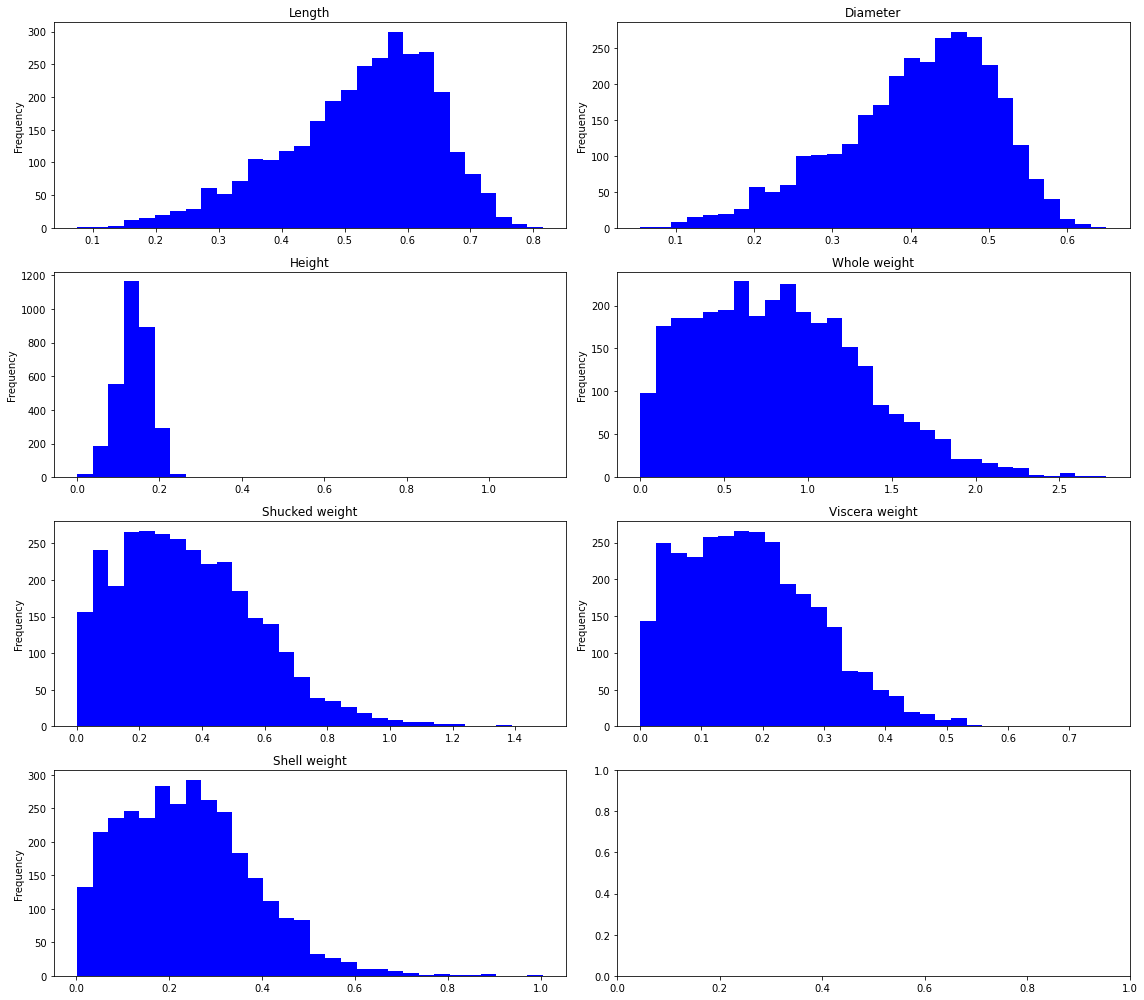

In [119]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)
    
plt.tight_layout()
plt.show()

**Box plot (Outliers)**

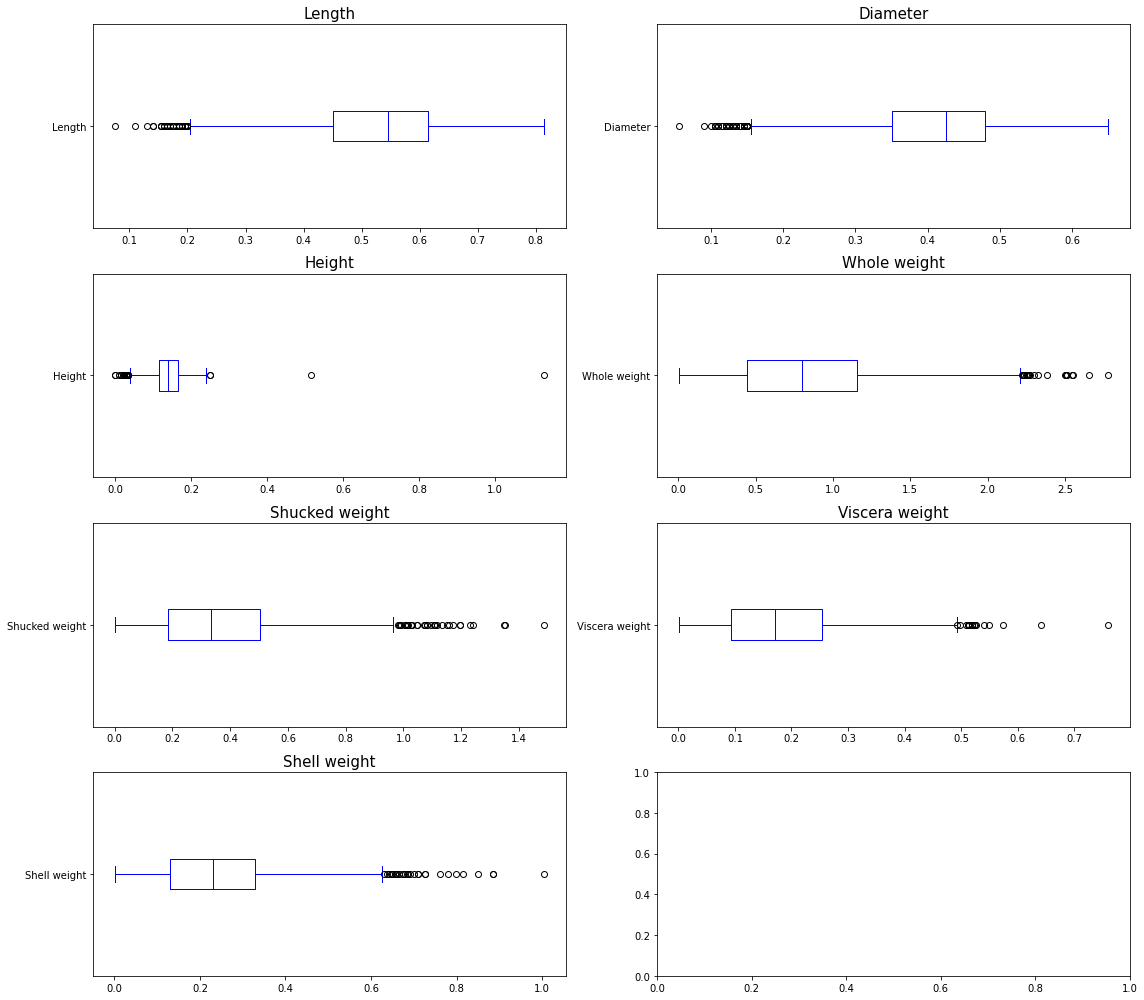

In [120]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

Most of the features contain outliers but 'height' has extreme outliers 

**Pie chart : Categorical feature** sex

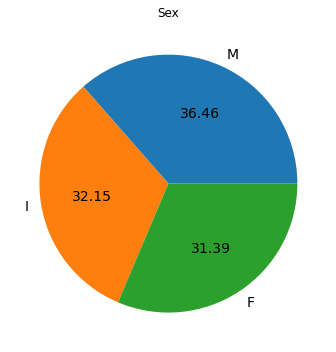

In [121]:
t = train[categorical_feature].value_counts(normalize=True)
t.plot(kind='pie',
       figsize=(5,5),
       title=categorical_feature,
       ylabel="",
       autopct="%.2f",
       fontsize=14)
plt.tight_layout()
plt.show()

**Pearson Correlation**

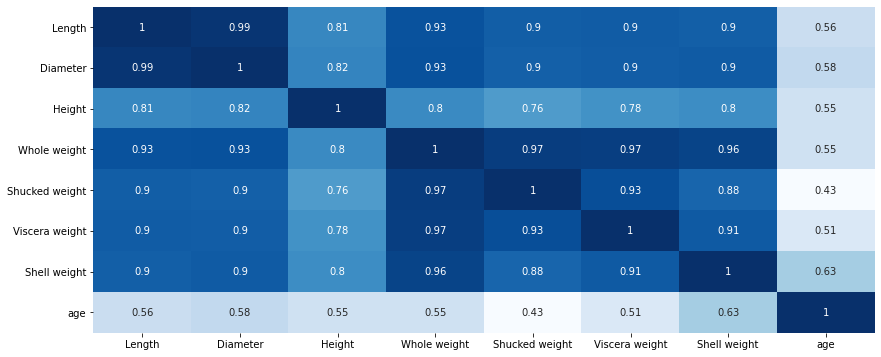

In [122]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(method='pearson'), annot=True, cbar=False, cmap='Blues')
plt.show()

**Scatter plot**

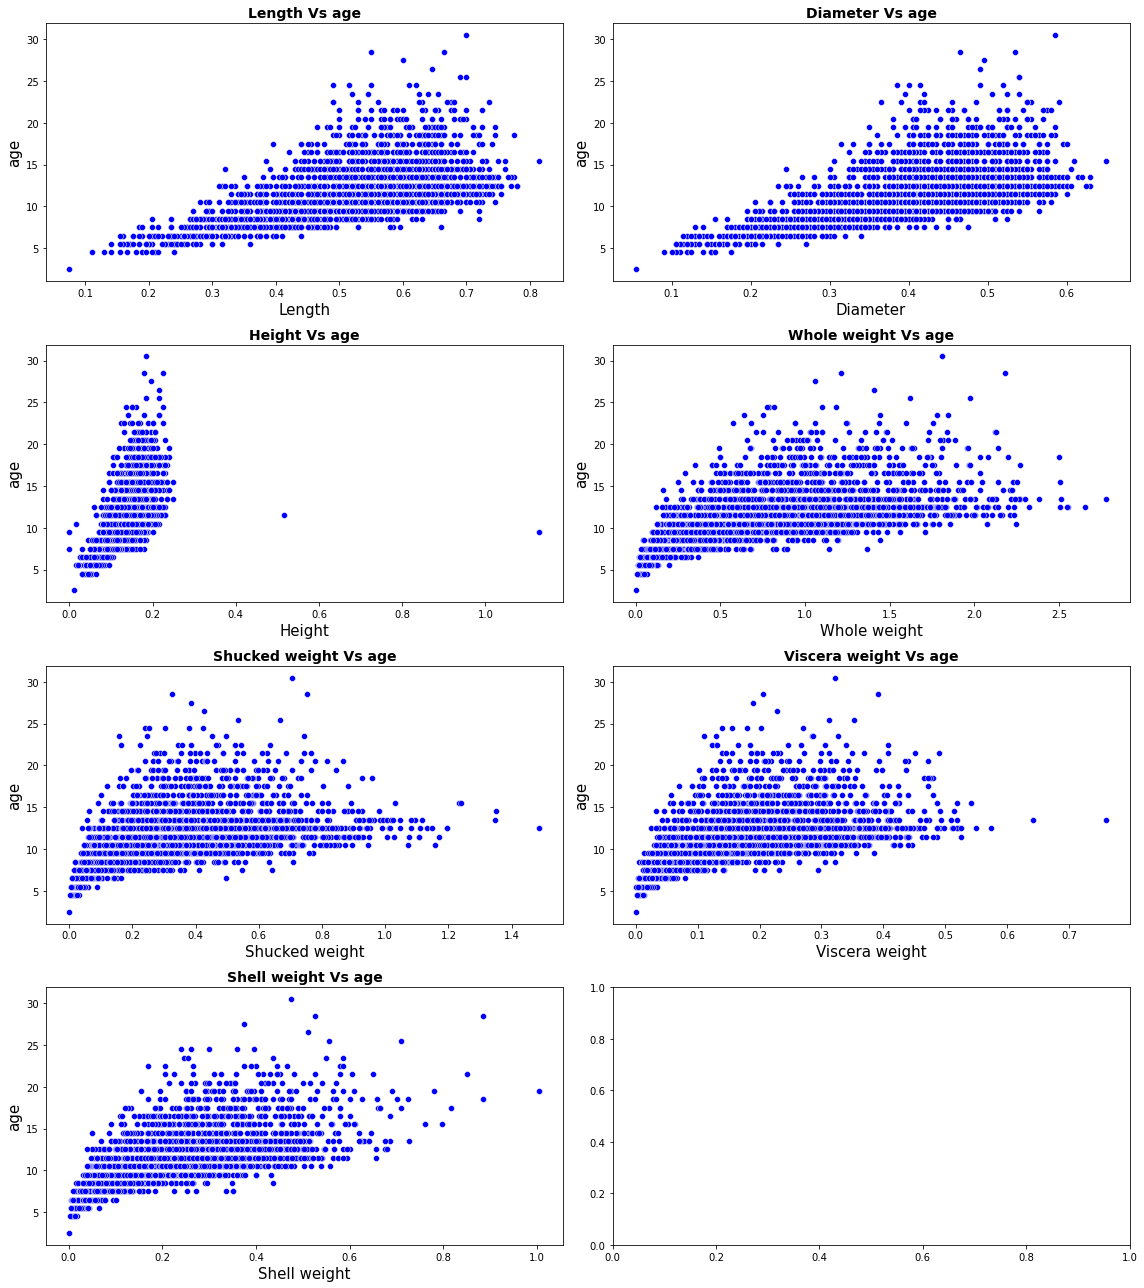

In [123]:
fig, axes = plt.subplots(4,2,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    _ = sns.scatterplot(x=train[c], y=train[target],ax=axes[i], color='blue')
    axes[i].set_title(f"{c} Vs age", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('age', fontsize=15)
    
plt.tight_layout()
plt.show()

Some features have a linear relationship with target

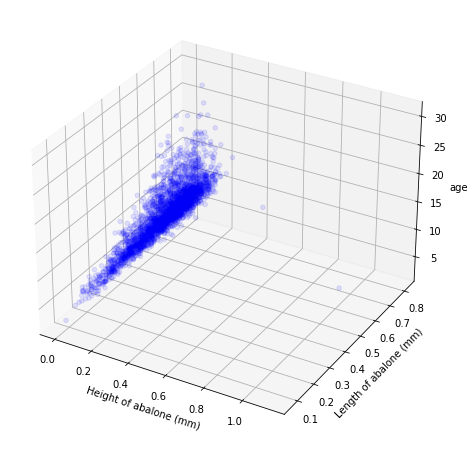

In [124]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('age')
ax.scatter3D(train['Height'], train['Length'], train[target], c='blue', alpha=0.1);

plt.show()

In [125]:
train.Sex = train.Sex.replace({"M":1, "I":0, "F":-1})
test.Sex = test.Sex.replace({"M":1, "I":0, "F":-1})

C:\Users\nehap\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [126]:
idx = train.loc[train.Height>0.4].index
train.drop(idx, inplace=True)

idx = train.loc[train['Viscera weight']>0.6].index
train.drop(idx, inplace=True)

idx = train.loc[train[target]>25].index
train.drop(idx, inplace=True)

C:\Users\nehap\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\nehap\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\nehap\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [127]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
4014,0.625,0.480,0.175,1.0650,0.4865,0.2590,0.285,1
3252,0.480,0.380,0.130,0.6175,0.3000,0.1420,0.175,1
305,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.011,0
1857,0.505,0.400,0.145,0.7045,0.3340,0.1425,0.207,0
439,0.500,0.415,0.165,0.6885,0.2490,0.1380,0.250,1


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

In [129]:
# Linear regression
lr_params = {'fit_intercept':[True,False]}

# Lasso
lasso_params = {'alpha': [1e-4, 1e-3, 1e-2, 1, 10, 100]}

# Decision tree
dt_params =  {'max_depth': [4, 6, 8, 10, 12, 14, 16, 20],
            'min_samples_split': [5, 10, 20, 30, 40, 50],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128,256]}

# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250]}

# XGBoost
xgb_params = {'n_estimators':[100, 200, 300] ,
              'max_depth':list(range(1,10)) , 
             'learning_rate':[0.006,0.007,0.008,0.05,0.09] ,
             'min_child_weight':list(range(1,10))}

In [130]:
params = [lr_params, lasso_params, dt_params, rf_params, xgb_params]

# searching Hyperparameters
i=0
for name, model in models.items():
    print(name)
    regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = params[i],
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
    search = regressor.fit(X_train, y_train)
    
    print('Best params :',search.best_params_)
    print("RMSE :", -search.best_score_)
    i+=1
    print()

C:\Users\nehap\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


linear_regression
Best params : {'fit_intercept': True}
RMSE : 2.168515838408849

lasso


C:\Users\nehap\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params : {'alpha': 0.0001}
RMSE : 2.168463202118033

decision_tree
Best params : {'min_samples_split': 50, 'max_leaf_nodes': 128, 'max_features': 0.4, 'max_depth': 10}
RMSE : 2.344781749560874

random_forest
Best params : {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
RMSE : 2.116269006500709

xgboost
Best params : {'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05}
RMSE : 2.1399798094863853



**Final Modelling**

In [131]:
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=200,
                      random_state=1)

In [132]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

**Evaluation**

In [135]:
from sklearn.metrics import mean_squared_error

print("Train rmse : ", mean_squared_error(y_train, model.predict(X_train)))
print("Test rmse : ", mean_squared_error(y_test, model.predict(X_test)))

Train rmse :  2.3451370986409703
Test rmse :  4.607423416471683


In [136]:
df = pd.DataFrame([features, model.feature_importances_]).T
df.columns = ['feature', 'importance']
df.sort_values("importance", ascending=False)

,feature,importance
6,Shell weight,0.247956
3,Whole weight,0.157105
2,Height,0.135278
5,Viscera weight,0.124763
4,Shucked weight,0.1204
1,Diameter,0.109247
0,Length,0.08051
7,Sex,0.024743


**Scatter plot**

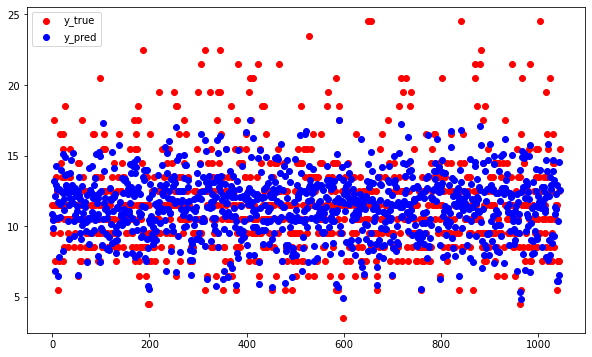

In [137]:
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()

**Error distribution**

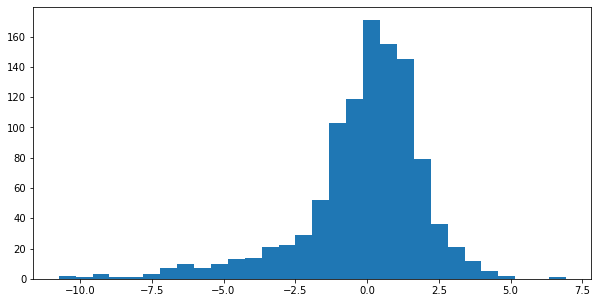

In [138]:
plt.figure(figsize=(10,5))
plt.hist(y_pred-y_test, bins=30)
plt.show()